In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import collections
import seaborn as sns
import statistics


Using TensorFlow backend.


In [3]:
df = pd.read_csv('../data/data_full.csv')
df

,protein,tm,sequence
0,1ju3,307.95,MVDGNYSVASNVMVPMRDGVRLAVDLYRPDADGPVPVLLVRNPYDK...
1,1hml,312.95,MRFFVPLFLVGILFPAILAKQFTKCELSQLLKDIDGYGGIALPELI...
2,1ihb_a,314.65,MAEPWGNELASAAARGDLEQLTSLLQNNVNVNAQNGFGRTALQVMK...
3,1blc,314.75,KELNDLEKKYNAHIGVYALDTKSGKEVKFNSDKRFAYASTSKAINS...
4,1d0b,315.25,ETITVSTPIKQIFPDDAFAETIKDNLKKKSVTDAVTQNELNSIDQI...
5,1chk_a,316.35,AGAGLDDPHKKEIAMELVSSAENSSLDWKAQYKYIEDIGDGRGYTG...
6,1aqh,316.85,TPTTFVHLFEWNWQDVAQECEQYLGPKGYAAVQVSPPNEHITGSQW...
7,1mac,317.65,GSVFWEPLSYFNPSTWEKADGYSNGGVFNCTWRANNVNFTNDGKLK...
8,1s3g,317.75,MNIVLMGLPGAGKGTQADRIVEKYGTPHISTGDMFRAAIQEGTELG...
9,1fga,318.15,PALPEDGGSGAFPPGHFKDPKRLYCKNGGFFLRIHPDGRVDGVREK...


In [30]:
# add features
for index, row in df.iterrows():
    sequence = df.loc[index, 'sequence']
    counts = collections.Counter(sequence)
    
    protein = df.loc[index, 'protein']
    
    df.loc[index, 'protein'] = protein.upper()
    
    for key in counts.keys():
        df.at[index, key] = counts[key]
    
    # add (E + K)/(Q + H) ratio feature
    if (counts['Q'] + counts['H']) != 0:
        df.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        df.at[index, '(E + K)/(Q + H)'] = 0   
        
    df.at[index, 'E'] = 1 if counts['E'] > 0 else 0  
    

# fill all NaN's with 0 
df = df.fillna(0)

In [42]:
proteins = df['protein']

X = df.drop(['tm', 'protein', 'sequence'], axis=1)
y = df['tm']

X_train, X_test, y_train, y_test = train_test_split(X, y)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [57]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = len(X_train.columns)))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])


In [62]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
183/183 [==============================] - 0s 192us/step - loss: 109.1080 - acc: 0.0109
Epoch 2/100
183/183 [==============================] - 0s 201us/step - loss: 127.2773 - acc: 0.0109
Epoch 3/100
183/183 [==============================] - 0s 190us/step - loss: 139.5026 - acc: 0.0164
Epoch 4/100
183/183 [==============================] - 0s 216us/step - loss: 126.8840 - acc: 0.0109
Epoch 5/100
183/183 [==============================] - 0s 199us/step - loss: 110.6073 - acc: 0.0000e+00
Epoch 6/100
183/183 [==============================] - 0s 183us/step - loss: 108.3611 - acc: 0.0109
Epoch 7/100
183/183 [==============================] - 0s 171us/step - loss: 109.0084 - acc: 0.0164
Epoch 8/100
183/183 [==============================] - 0s 184us/step - loss: 116.2825 - acc: 0.0164
Epoch 9/100
183/183 [==============================] - 0s 160us/step - loss: 116.9765 - acc: 0.0164
Epoch 10/100
183/183 [==============================] - 0s 182us/step - loss: 111.8103 - acc: 0.

183/183 [==============================] - 0s 174us/step - loss: 135.7565 - acc: 0.0000e+00
Epoch 82/100
183/183 [==============================] - 0s 169us/step - loss: 120.4194 - acc: 0.0055
Epoch 83/100
183/183 [==============================] - 0s 168us/step - loss: 88.0356 - acc: 0.0164
Epoch 84/100
183/183 [==============================] - 0s 180us/step - loss: 106.7766 - acc: 0.0000e+00
Epoch 85/100
183/183 [==============================] - 0s 168us/step - loss: 91.2564 - acc: 0.0000e+00
Epoch 86/100
183/183 [==============================] - 0s 166us/step - loss: 78.1986 - acc: 0.0164
Epoch 87/100
183/183 [==============================] - 0s 195us/step - loss: 91.4817 - acc: 0.0055
Epoch 88/100
183/183 [==============================] - 0s 176us/step - loss: 92.2791 - acc: 0.0055
Epoch 89/100
183/183 [==============================] - 0s 183us/step - loss: 84.5098 - acc: 0.0164
Epoch 90/100
183/183 [==============================] - 0s 197us/step - loss: 80.4060 - acc: 0.021

In [8]:
# pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))


# ind = np.arange(len(pred))  # the x locations for the groups
# width = 0.30 #  the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)


# y_pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

# y_pred = [float(y_pred[i]) for i in range(len(y_pred))]


# real_bar = ax.bar(ind, y_test.values, width, color='b')
# # zvals = [1,2,3]
# predicted_bar = ax.bar(ind+ width, y_pred, width, color='g')
# # kvals = [11,12,13]

# ax.set_ylabel('Tm')
# ax.set_xticks(ind+width)
# # ax.set_xticklabels( X_train['protein'] )
# ax.legend( (real_bar[0], predicted_bar[0]), ('Real', 'Predicted') )

# plt.title('ANN for Prediction of Tm')
# plt.ylabel('Tm (K)') 
# plt.xlabel('Protein') 
# plt.style = 'seaborn'


# # adds the y-value to each bar 
# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# # autolabel(rects1)
# # autolabel(rects2)


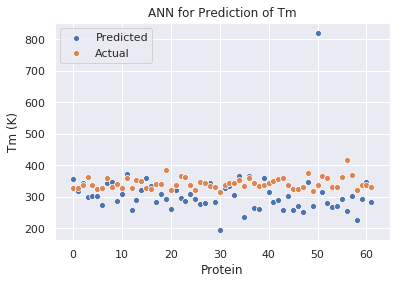

In [48]:
# pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

# ind = np.arange(len(pred))  # the x locations for the groups
# width = 0.30 #  the width of the bars

# fig = plt.figure()



y_pred = model.predict(X_test)

y_pred = [float(y_pred[i]) for i in range(len(y_pred))]

sns.set()

ax = sns.scatterplot(x= list(range(len(y_pred))), y=y_pred, label='Predicted')
ax = sns.scatterplot(x= list(range(len(y_test))), y=y_test, label='Actual')

plt.title('ANN for Prediction of Tm')

# ax.legend()

plt.ylabel('Tm (K)') 
plt.xlabel('Protein') 
plt.savefig('ann.png') 


In [52]:
len(df)

245

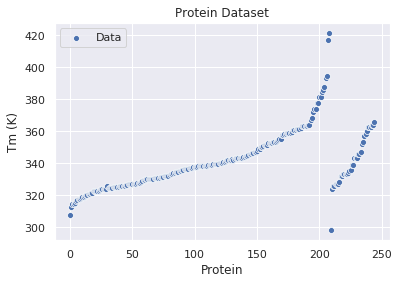

In [12]:
ax = sns.scatterplot(x= list(range(len(df['tm']))), y=df['tm'], label='Data')
plt.title('Protein Dataset')

plt.ylabel('Tm (K)') 
plt.xlabel('Protein') 
plt.savefig('data.png')


In [54]:
model.losses.mean_absolute_percentage_error(y_true, y_pred)


AttributeError: 'list' object has no attribute 'mean_absolute_percentage_error'

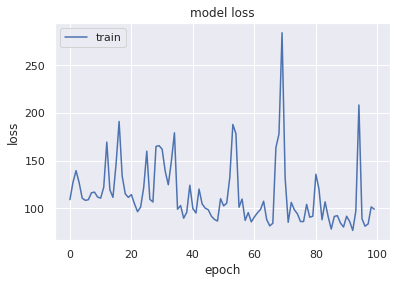

In [64]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

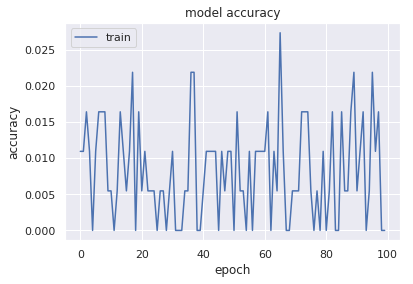

In [66]:
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
total = 0
y_test = list(y_test)
y_pred = list(y_pred)
for i in range(len(y_test)):
    diff = abs(y_pred[i] - y_test[i])
    total += diff / list(y_test)[i]

total = total / len(y_test)

In [78]:
total

0.1629297454183561